In [5]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [7]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [8]:
dataf = "../../data/latcheck.csv"

In [28]:
!sha256sum $dataf

ec502842d048752c2d72cbe38dbf93f0021e880b060c8a445ab065ee13a64d80  ../../data/latcheck.csv


In [19]:
df = pd.read_csv(dataf, names=['Run', 'min', 'max', 'avg'], index_col=0)

In [20]:
df

,min,max,avg
Run,,,
no CAT,19.7800,1.175490e-38,19.9061
CAT exclusive 0x00f,12.1663,1.175490e-38,12.3438
CAT exclusive 0x001,18.8428,1.175490e-38,18.8803
CAT shared tiny,21.3734,1.175490e-38,21.4634


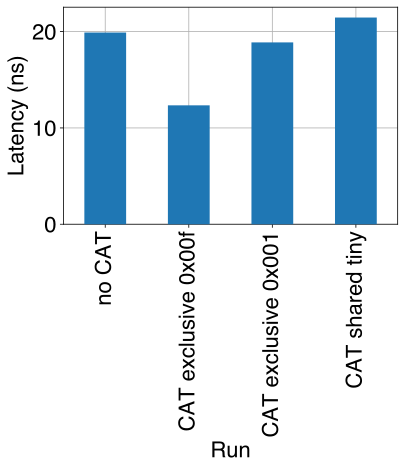

In [25]:
ax = df['avg'].plot.bar(zorder=3)
ax.set_ylabel("Latency (ns)")
ax.grid(axis="both", zorder=0)